<a href="https://colab.research.google.com/github/Nicohim87/DeepLearning/blob/main/Pertemuan3/session3_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/Rice_Image_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Ipsala/Ipsala (5499).jpg  
  inflating: Rice_Image_Dataset/Ipsala/Ipsala (55).jpg  
  inflating: Rice_Image_Dataset/Ipsala/Ipsala (550).jpg  
  inflating: Rice_Image_Dataset/Ipsala/Ipsala (5500).jpg  
  inflating: Rice_Image_Dataset/Ipsala/Ipsala (5501).jpg  
  inflating: Rice_Image_Dataset/Ipsala/Ipsala (5502).jpg  
  inflating: Rice_Image_Dataset/Ipsala/Ipsala (5503).jpg  
  inflating: Rice_Image_Dataset/Ipsala/Ipsala (5504).jpg  
  inflating: Rice_Image_Dataset/Ipsala/Ipsala (5505).jpg  
  inflating: Rice_Image_Dataset/Ipsala/Ipsala (5506).jpg  
  inflating: Rice_Image_Dataset/Ipsala/Ipsala (5507).jpg  
  inflating: Rice_Image_Dataset/Ipsala/Ipsala (5508).jpg  
  inflating: Rice_Image_Dataset/Ipsala/Ipsala (5509).jpg  
  inflating: Rice_Image_Dataset/Ipsala/Ipsala (551).jpg  
  inflating: Rice_Image_Dataset/Ipsala/Ipsala (5510).jpg  
  inflating: Rice_Image_Dataset/Ipsala/Ipsala (5511).jpg  
  inflati

In [ ]:
import numpy as np
import tensorflow as tf
import os

In [ ]:
DATASET_PATH = "/content/Rice_Image_Dataset"
images = []
classes = []
class_list = []

In [ ]:
for i, classname in enumerate(os.listdir(DATASET_PATH)):
    class_list.append(classname)
    for j, filename in enumerate(os.listdir(os.path.join(DATASET_PATH, classname))):
        img = tf.keras.utils.load_img(os.path.join(DATASET_PATH, classname, filename), color_mode='grayscale')
        img = tf.keras.utils.img_to_array(img)
        img = img/255.0
        images.append(img)
        classes.append(i)
        if j >= 2000:
            break

In [ ]:
images = np.array(images)
classes = np.array(classes)

In [ ]:
y = tf.keras.utils.to_categorical(classes, num_classes=len(class_list))
y.shape

(6003, 3)

### Model

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(images, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(images, y, test_size=0.5)

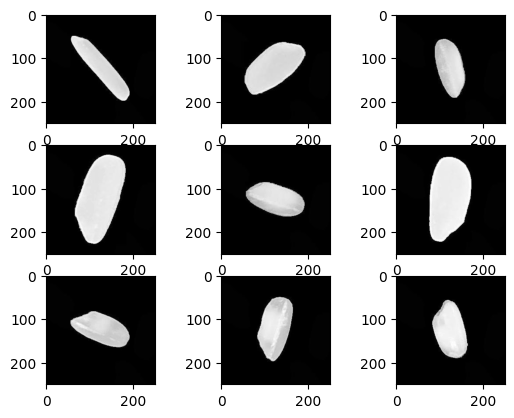

In [ ]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(x_train[0].shape)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(class_list), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 250, 250, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 250, 250, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 125, 125, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 125, 125, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1000000)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      64,000,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,021,059 (244.22 MB)

 Trainable params: 64,021,059 (244.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 20, batch_size = 64, callbacks=[early_stopping])

Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 62s 477ms/step - accuracy: 0.8413 - loss: 0.6012 - val_accuracy: 0.9987 - val_loss: 0.0037
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 40s 246ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 0.9977 - val_loss: 0.0068
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 246ms/step - accuracy: 0.9987 - loss: 0.0053 - val_accuracy: 0.9997 - val_loss: 0.0012
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - accuracy: 1.0000 - loss: 2.0681e-04 - val_accuracy: 1.0000 - val_loss: 3.1847e-04
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 245ms/step - accuracy: 1.0000 - loss: 4.4714e-05 - val_accuracy: 1.0000 - val_loss: 3.6575e-04
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 244ms/step - accuracy: 1.0000 - loss: 3.3604e-05 - val_accuracy: 1.0000 - val_loss: 3.7855e-04


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━

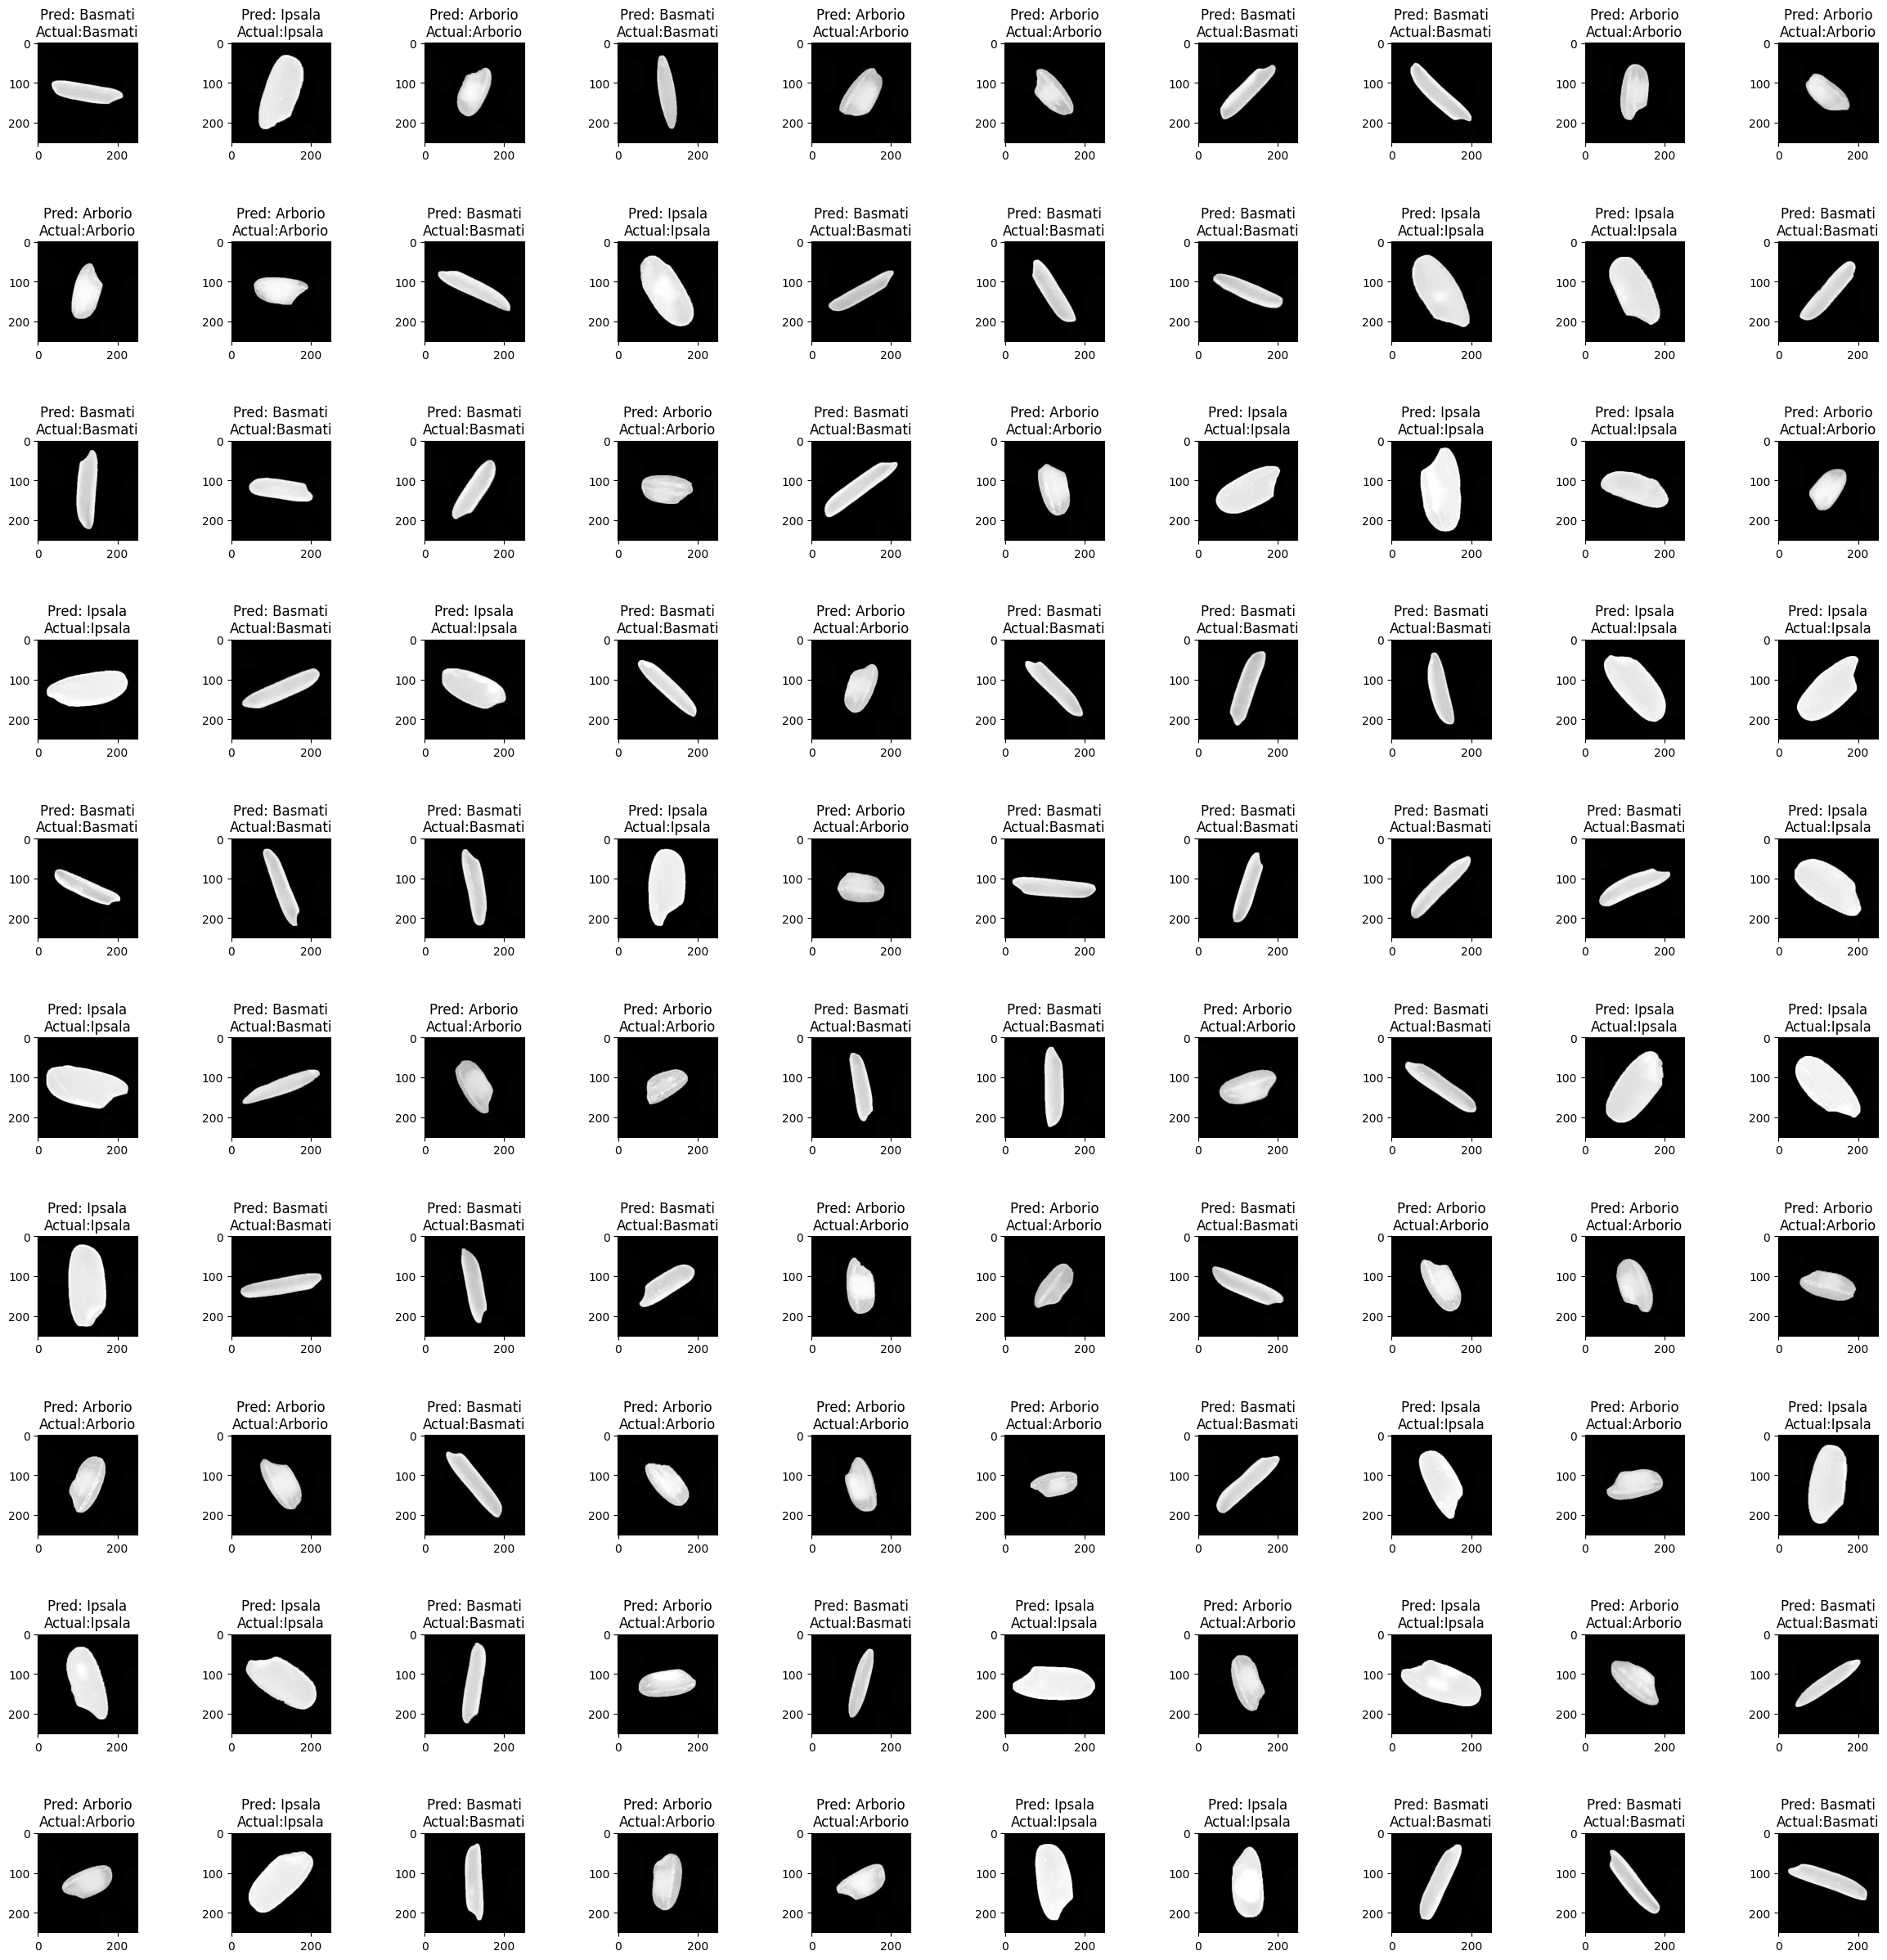

In [ ]:
plt.figure(figsize=(30,30))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(x_test[i], cmap='gray')

    img = np.expand_dims(x_test[i], axis=0)
    prediction = model.predict(img)

    plt.title(f"Pred: {class_list[np.argmax(prediction)]}\nActual:{class_list[np.argmax(y_test[i])]}")

plt.subplots_adjust(hspace=1)